In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras')

# Test with unseen data
def predict_spectrogram(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    print(f"Prediction: {prediction}")
    return "Non-Bee" if prediction >= 0.7 else "Bee"

# Example prediction
test_image = '/content/drive/MyDrive/bee_dataset/bee_spectrogram/Bee_401.png'  # Replace with your test file
print(predict_spectrogram(test_image))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: 7.756892046018038e-06
Bee


In [ ]:
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Paths
audio_file = '/content/bees-29400.mp3'  # Replace with your audio file path
# model_path = '/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras'
model_path = '/content/drive/MyDrive/bee_dataset/best_bee_classifier_model_res_spec.keras'
# model = load_model('/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras')


# Load the trained model
model = load_model(model_path)

# Function to create a Mel spectrogram
def create_mel_spectrogram(audio_path, img_size=(224, 224)):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Create Mel spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot the spectrogram without axis
        plt.figure(figsize=(2, 2), dpi=100)
        plt.axis('off')  # Turn off axes
        plt.imshow(spectrogram_db, aspect='auto', cmap='magma', origin='lower')
        plt.tight_layout(pad=0)

        # Save the spectrogram to an image
        temp_image_path = "temp_spectrogram.png"
        plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load and resize the image
        img = Image.open(temp_image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img_array
    except Exception as e:
        print(f"Error creating spectrogram: {e}")
        return None

# Preprocess the audio file
spectrogram = create_mel_spectrogram(audio_file)

if spectrogram is not None:
    # Add batch dimension
    spectrogram = np.expand_dims(spectrogram, axis=0)

    # Make a prediction
    prediction = model.predict(spectrogram)

    # Interpret the prediction
    if prediction[0] > 0.5:
        print(f"The audio file is classified as: **no BEE** (Probability: {prediction[0][0]:.2f})")
    else:
        print(f"The audio file is classified as: **BEE** (Probability: {prediction[0][0]:.2f})")
else:
    print("Failed to create spectrogram for prediction.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The audio file is classified as: **no BEE** (Probability: 0.50)


In [ ]:
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Paths
audio_file = '/content/dog-barking-70772.mp3'  # Replace with your audio file path
model_path = '/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras'

# Load the trained model
model = load_model(model_path)

# Function to create a Mel spectrogram
def create_mel_spectrogram(audio_path, img_size=(224, 224)):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Create Mel spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot the spectrogram without axis
        plt.figure(figsize=(2, 2), dpi=100)
        plt.axis('off')  # Turn off axes
        plt.imshow(spectrogram_db, aspect='auto', cmap='magma', origin='lower')
        plt.tight_layout(pad=0)

        # Save the spectrogram to an image
        temp_image_path = "temp_spectrogram.png"
        plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load and resize the image
        img = Image.open(temp_image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img_array
    except Exception as e:
        print(f"Error creating spectrogram: {e}")
        return None

# Preprocess the audio file
spectrogram = create_mel_spectrogram(audio_file)

if spectrogram is not None:
    # Add batch dimension
    spectrogram = np.expand_dims(spectrogram, axis=0)

    # Make a prediction
    prediction = model.predict(spectrogram)
    probability = prediction[0][0]

    # Interpret the prediction based on custom threshold
    # if probability < 0.8 or 0.8probability > 0.2 :
    #     print(f"The audio file is classified as: **NO BEE** (Probability: {probability:.2f})")
    if probability >= 0.8:
        print(f"The audio file is classified as: **NO BEE** (Probability: {probability:.2f})")
    elif probability <= 0.2:
        print(f"The audio file is classified as: **BEE** (Probability: {probability:.2f})")
    else:
        print(f"The audio file is classified as: **Not sure** (Probability: {probability:.2f})")
else:
    print("Failed to create spectrogram for prediction.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The audio file is classified as: **NO BEE** (Probability: 0.96)


In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths
audio_file = '/content/drive/MyDrive/bee_dataset/Bee_Audios/Bee_100.wav'  # Replace with your 5-minute audio file path
model_path = '/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras'

model = load_model(model_path)

# Function to create a Mel spectrogram for a given audio clip
def create_mel_spectrogram(y, sr, img_size=(224, 224)):
    try:
        # Create Mel spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot the spectrogram without axis
        plt.figure(figsize=(2, 2), dpi=100)
        plt.axis('off')  # Turn off axes
        plt.imshow(spectrogram_db, aspect='auto', cmap='magma', origin='lower')
        plt.tight_layout(pad=0)

        # Save the spectrogram to an image
        temp_image_path = "temp_spectrogram.png"
        plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Load and resize the image
        img = Image.open(temp_image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img_array
    except Exception as e:
        print(f"Error creating spectrogram: {e}")
        return None

# Function to process a long audio file and make predictions
def predict_long_audio(audio_path, model, segment_duration=10.01):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    total_duration = librosa.get_duration(y=y, sr=sr)

    # Calculate the number of segments
    num_segments = int(np.ceil(total_duration / segment_duration))
    bee_count = 0
    no_bee_count = 0
    not_sure_count = 0

    print(f"Total Duration: {total_duration:.2f}s, Number of Segments: {num_segments}")

    for i in range(num_segments):
        # Extract the segment
        start_sample = i * segment_duration * sr
        end_sample = min((i + 1) * segment_duration * sr, len(y))
        segment = y[int(start_sample):int(end_sample)]

        # Create spectrogram
        spectrogram = create_mel_spectrogram(segment, sr)
        if spectrogram is not None:
            # Add batch dimension
            spectrogram = np.expand_dims(spectrogram, axis=0)

            # Make a prediction
            prediction = model.predict(spectrogram)
            probability = prediction[0][0]

            # Interpret the prediction based on custom threshold
            if probability >= 0.8:
                no_bee_count += 1
                print(f"Segment {i+1}: **NO BEE** (Probability: {probability:.2f})")
            elif probability <= 0.2:
                bee_count += 1
                print(f"Segment {i+1}: **BEE** (Probability: {probability:.2f})")
            else:
                not_sure_count += 1
                print(f"Segment {i+1}: **Not Sure** (Probability: {probability:.2f})")
        else:
            print(f"Segment {i+1}: Failed to create spectrogram.")

    # Final Results
    total_segments = bee_count + no_bee_count + not_sure_count
    print("\nOverall Results:")
    print(f"Total Segments: {total_segments}")
    print(f"Bee Segments: {bee_count} ({(bee_count / total_segments) * 100:.2f}%)")
    print(f"No Bee Segments: {no_bee_count} ({(no_bee_count / total_segments) * 100:.2f}%)")
    print(f"Not Sure Segments: {not_sure_count} ({(not_sure_count / total_segments) * 100:.2f}%)")

    return {
        "total_segments": total_segments,
        "bee_segments": bee_count,
        "no_bee_segments": no_bee_count,
        "not_sure_segments": not_sure_count,
        "bee_percentage": (bee_count / total_segments) * 100,
        "no_bee_percentage": (no_bee_count / total_segments) * 100,
        "not_sure_percentage": (not_sure_count / total_segments) * 100,
    }

# Run prediction on the 5-minute audio file
results = predict_long_audio(audio_file, model)

# Print Final Classification
print("\nFinal Classification:")
if results["no_bee_percentage"] >= 80:
    print("The audio file is classified as: **NO BEE**")
elif results["bee_percentage"] >= 80:
    print("The audio file is classified as: **BEE**")
else:
    print("The audio file is classified as: **Not Sure**")


TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'mobilenetv2_1.00_224_input'}, 'registered_name': None}, {'module': 'keras.src.engine.functional', 'class_name': 'Functional', 'config': {'name': 'mobilenetv2_1.00_224', 'trainable': False, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'registered_name': None, 'name': 'input_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'Conv1', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 3]}, 'name': 'Conv1', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'bn_Conv1', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'bn_Conv1', 'inbound_nodes': [[['Conv1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'Conv1_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'Conv1_relu', 'inbound_nodes': [[['bn_Conv1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'expanded_conv_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise', 'inbound_nodes': [[['Conv1_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'expanded_conv_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise_BN', 'inbound_nodes': [[['expanded_conv_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'expanded_conv_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise_relu', 'inbound_nodes': [[['expanded_conv_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'expanded_conv_project', 'trainable': False, 'dtype': 'float32', 'filters': 16, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_project', 'inbound_nodes': [[['expanded_conv_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'expanded_conv_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 16]}, 'name': 'expanded_conv_project_BN', 'inbound_nodes': [[['expanded_conv_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_1_expand', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 16]}, 'name': 'block_1_expand', 'inbound_nodes': [[['expanded_conv_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_expand_BN', 'inbound_nodes': [[['block_1_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_1_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_expand_relu', 'inbound_nodes': [[['block_1_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_1_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_pad', 'inbound_nodes': [[['block_1_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_1_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 113, 113, 96]}, 'name': 'block_1_depthwise', 'inbound_nodes': [[['block_1_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_depthwise_BN', 'inbound_nodes': [[['block_1_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_1_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_depthwise_relu', 'inbound_nodes': [[['block_1_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_1_project', 'trainable': False, 'dtype': 'float32', 'filters': 24, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_project', 'inbound_nodes': [[['block_1_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_1_project_BN', 'inbound_nodes': [[['block_1_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_2_expand', 'trainable': False, 'dtype': 'float32', 'filters': 144, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_2_expand', 'inbound_nodes': [[['block_1_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_expand_BN', 'inbound_nodes': [[['block_2_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_2_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_expand_relu', 'inbound_nodes': [[['block_2_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_2_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise', 'inbound_nodes': [[['block_2_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise_BN', 'inbound_nodes': [[['block_2_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_2_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise_relu', 'inbound_nodes': [[['block_2_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_2_project', 'trainable': False, 'dtype': 'float32', 'filters': 24, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_project', 'inbound_nodes': [[['block_2_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_2_project_BN', 'inbound_nodes': [[['block_2_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_2_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 56, 56, 24], [None, 56, 56, 24]]}, 'name': 'block_2_add', 'inbound_nodes': [[['block_1_project_BN', 0, 0, {}], ['block_2_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_3_expand', 'trainable': False, 'dtype': 'float32', 'filters': 144, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_3_expand', 'inbound_nodes': [[['block_2_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_expand_BN', 'inbound_nodes': [[['block_3_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_3_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_expand_relu', 'inbound_nodes': [[['block_3_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_3_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_pad', 'inbound_nodes': [[['block_3_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_3_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 57, 57, 144]}, 'name': 'block_3_depthwise', 'inbound_nodes': [[['block_3_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_depthwise_BN', 'inbound_nodes': [[['block_3_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_3_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_depthwise_relu', 'inbound_nodes': [[['block_3_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_3_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_project', 'inbound_nodes': [[['block_3_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_3_project_BN', 'inbound_nodes': [[['block_3_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_4_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_4_expand', 'inbound_nodes': [[['block_3_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_expand_BN', 'inbound_nodes': [[['block_4_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_4_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_expand_relu', 'inbound_nodes': [[['block_4_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_4_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise', 'inbound_nodes': [[['block_4_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise_BN', 'inbound_nodes': [[['block_4_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_4_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise_relu', 'inbound_nodes': [[['block_4_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_4_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_project', 'inbound_nodes': [[['block_4_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_4_project_BN', 'inbound_nodes': [[['block_4_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_4_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 28, 28, 32], [None, 28, 28, 32]]}, 'name': 'block_4_add', 'inbound_nodes': [[['block_3_project_BN', 0, 0, {}], ['block_4_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_5_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_5_expand', 'inbound_nodes': [[['block_4_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_expand_BN', 'inbound_nodes': [[['block_5_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_5_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_expand_relu', 'inbound_nodes': [[['block_5_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_5_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise', 'inbound_nodes': [[['block_5_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise_BN', 'inbound_nodes': [[['block_5_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_5_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise_relu', 'inbound_nodes': [[['block_5_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_5_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_project', 'inbound_nodes': [[['block_5_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_5_project_BN', 'inbound_nodes': [[['block_5_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_5_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 28, 28, 32], [None, 28, 28, 32]]}, 'name': 'block_5_add', 'inbound_nodes': [[['block_4_add', 0, 0, {}], ['block_5_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_6_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_6_expand', 'inbound_nodes': [[['block_5_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_expand_BN', 'inbound_nodes': [[['block_6_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_6_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_expand_relu', 'inbound_nodes': [[['block_6_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_6_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_pad', 'inbound_nodes': [[['block_6_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_6_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 29, 29, 192]}, 'name': 'block_6_depthwise', 'inbound_nodes': [[['block_6_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_depthwise_BN', 'inbound_nodes': [[['block_6_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_6_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_depthwise_relu', 'inbound_nodes': [[['block_6_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_6_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_project', 'inbound_nodes': [[['block_6_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_6_project_BN', 'inbound_nodes': [[['block_6_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_7_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_7_expand', 'inbound_nodes': [[['block_6_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_expand_BN', 'inbound_nodes': [[['block_7_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_7_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_expand_relu', 'inbound_nodes': [[['block_7_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_7_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise', 'inbound_nodes': [[['block_7_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise_BN', 'inbound_nodes': [[['block_7_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_7_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise_relu', 'inbound_nodes': [[['block_7_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_7_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_project', 'inbound_nodes': [[['block_7_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_7_project_BN', 'inbound_nodes': [[['block_7_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_7_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_7_add', 'inbound_nodes': [[['block_6_project_BN', 0, 0, {}], ['block_7_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_8_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_8_expand', 'inbound_nodes': [[['block_7_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_expand_BN', 'inbound_nodes': [[['block_8_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_8_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_expand_relu', 'inbound_nodes': [[['block_8_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_8_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise', 'inbound_nodes': [[['block_8_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise_BN', 'inbound_nodes': [[['block_8_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_8_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise_relu', 'inbound_nodes': [[['block_8_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_8_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_project', 'inbound_nodes': [[['block_8_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_8_project_BN', 'inbound_nodes': [[['block_8_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_8_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_8_add', 'inbound_nodes': [[['block_7_add', 0, 0, {}], ['block_8_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_9_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_9_expand', 'inbound_nodes': [[['block_8_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_expand_BN', 'inbound_nodes': [[['block_9_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_9_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_expand_relu', 'inbound_nodes': [[['block_9_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_9_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise', 'inbound_nodes': [[['block_9_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise_BN', 'inbound_nodes': [[['block_9_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_9_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise_relu', 'inbound_nodes': [[['block_9_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_9_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_project', 'inbound_nodes': [[['block_9_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_9_project_BN', 'inbound_nodes': [[['block_9_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_9_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_9_add', 'inbound_nodes': [[['block_8_add', 0, 0, {}], ['block_9_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_10_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_10_expand', 'inbound_nodes': [[['block_9_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_expand_BN', 'inbound_nodes': [[['block_10_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_10_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_expand_relu', 'inbound_nodes': [[['block_10_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_10_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise', 'inbound_nodes': [[['block_10_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise_BN', 'inbound_nodes': [[['block_10_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_10_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise_relu', 'inbound_nodes': [[['block_10_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_10_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_project', 'inbound_nodes': [[['block_10_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_10_project_BN', 'inbound_nodes': [[['block_10_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_11_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_11_expand', 'inbound_nodes': [[['block_10_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_expand_BN', 'inbound_nodes': [[['block_11_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_11_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_expand_relu', 'inbound_nodes': [[['block_11_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_11_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise', 'inbound_nodes': [[['block_11_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise_BN', 'inbound_nodes': [[['block_11_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_11_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise_relu', 'inbound_nodes': [[['block_11_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_11_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_project', 'inbound_nodes': [[['block_11_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_11_project_BN', 'inbound_nodes': [[['block_11_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_11_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 96], [None, 14, 14, 96]]}, 'name': 'block_11_add', 'inbound_nodes': [[['block_10_project_BN', 0, 0, {}], ['block_11_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_12_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_12_expand', 'inbound_nodes': [[['block_11_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_expand_BN', 'inbound_nodes': [[['block_12_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_12_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_expand_relu', 'inbound_nodes': [[['block_12_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_12_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise', 'inbound_nodes': [[['block_12_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise_BN', 'inbound_nodes': [[['block_12_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_12_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise_relu', 'inbound_nodes': [[['block_12_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_12_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_project', 'inbound_nodes': [[['block_12_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_12_project_BN', 'inbound_nodes': [[['block_12_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_12_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 96], [None, 14, 14, 96]]}, 'name': 'block_12_add', 'inbound_nodes': [[['block_11_add', 0, 0, {}], ['block_12_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_13_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_13_expand', 'inbound_nodes': [[['block_12_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_expand_BN', 'inbound_nodes': [[['block_13_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_13_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_expand_relu', 'inbound_nodes': [[['block_13_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_13_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_pad', 'inbound_nodes': [[['block_13_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_13_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 15, 15, 576]}, 'name': 'block_13_depthwise', 'inbound_nodes': [[['block_13_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_depthwise_BN', 'inbound_nodes': [[['block_13_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_13_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_depthwise_relu', 'inbound_nodes': [[['block_13_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_13_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_project', 'inbound_nodes': [[['block_13_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_13_project_BN', 'inbound_nodes': [[['block_13_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_14_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_14_expand', 'inbound_nodes': [[['block_13_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_expand_BN', 'inbound_nodes': [[['block_14_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_14_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_expand_relu', 'inbound_nodes': [[['block_14_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_14_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise', 'inbound_nodes': [[['block_14_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise_BN', 'inbound_nodes': [[['block_14_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_14_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise_relu', 'inbound_nodes': [[['block_14_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_14_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_project', 'inbound_nodes': [[['block_14_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_14_project_BN', 'inbound_nodes': [[['block_14_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_14_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 7, 7, 160], [None, 7, 7, 160]]}, 'name': 'block_14_add', 'inbound_nodes': [[['block_13_project_BN', 0, 0, {}], ['block_14_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_15_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_15_expand', 'inbound_nodes': [[['block_14_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_expand_BN', 'inbound_nodes': [[['block_15_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_15_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_expand_relu', 'inbound_nodes': [[['block_15_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_15_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise', 'inbound_nodes': [[['block_15_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise_BN', 'inbound_nodes': [[['block_15_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_15_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise_relu', 'inbound_nodes': [[['block_15_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_15_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_project', 'inbound_nodes': [[['block_15_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_15_project_BN', 'inbound_nodes': [[['block_15_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_15_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 7, 7, 160], [None, 7, 7, 160]]}, 'name': 'block_15_add', 'inbound_nodes': [[['block_14_add', 0, 0, {}], ['block_15_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_16_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_16_expand', 'inbound_nodes': [[['block_15_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_expand_BN', 'inbound_nodes': [[['block_16_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_16_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_expand_relu', 'inbound_nodes': [[['block_16_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_16_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise', 'inbound_nodes': [[['block_16_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise_BN', 'inbound_nodes': [[['block_16_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_16_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise_relu', 'inbound_nodes': [[['block_16_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_16_project', 'trainable': False, 'dtype': 'float32', 'filters': 320, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_project', 'inbound_nodes': [[['block_16_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 320]}, 'name': 'block_16_project_BN', 'inbound_nodes': [[['block_16_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'Conv_1', 'trainable': False, 'dtype': 'float32', 'filters': 1280, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 320]}, 'name': 'Conv_1', 'inbound_nodes': [[['block_16_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'Conv_1_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 1280]}, 'name': 'Conv_1_bn', 'inbound_nodes': [[['Conv_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'out_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 1280]}, 'name': 'out_relu', 'inbound_nodes': [[['Conv_1_bn', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0]], 'output_layers': [['out_relu', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': [None, 224, 224, 3]}}, {'module': 'keras.layers', 'class_name': 'GlobalAveragePooling2D', 'config': {'name': 'global_average_pooling2d', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last', 'keepdims': False}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 1280]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1280]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 3]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.0010000000474974513, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'binary_crossentropy', 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: Could not deserialize class 'Functional' because its parent module keras.src.engine.functional cannot be imported. Full object config: {'module': 'keras.src.engine.functional', 'class_name': 'Functional', 'config': {'name': 'mobilenetv2_1.00_224', 'trainable': False, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'registered_name': None, 'name': 'input_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'Conv1', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 3]}, 'name': 'Conv1', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'bn_Conv1', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'bn_Conv1', 'inbound_nodes': [[['Conv1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'Conv1_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'Conv1_relu', 'inbound_nodes': [[['bn_Conv1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'expanded_conv_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise', 'inbound_nodes': [[['Conv1_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'expanded_conv_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise_BN', 'inbound_nodes': [[['expanded_conv_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'expanded_conv_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_depthwise_relu', 'inbound_nodes': [[['expanded_conv_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'expanded_conv_project', 'trainable': False, 'dtype': 'float32', 'filters': 16, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'expanded_conv_project', 'inbound_nodes': [[['expanded_conv_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'expanded_conv_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 16]}, 'name': 'expanded_conv_project_BN', 'inbound_nodes': [[['expanded_conv_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_1_expand', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 16]}, 'name': 'block_1_expand', 'inbound_nodes': [[['expanded_conv_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_expand_BN', 'inbound_nodes': [[['block_1_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_1_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_expand_relu', 'inbound_nodes': [[['block_1_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_1_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 96]}, 'name': 'block_1_pad', 'inbound_nodes': [[['block_1_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_1_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 113, 113, 96]}, 'name': 'block_1_depthwise', 'inbound_nodes': [[['block_1_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_depthwise_BN', 'inbound_nodes': [[['block_1_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_1_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_depthwise_relu', 'inbound_nodes': [[['block_1_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_1_project', 'trainable': False, 'dtype': 'float32', 'filters': 24, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 96]}, 'name': 'block_1_project', 'inbound_nodes': [[['block_1_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_1_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_1_project_BN', 'inbound_nodes': [[['block_1_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_2_expand', 'trainable': False, 'dtype': 'float32', 'filters': 144, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_2_expand', 'inbound_nodes': [[['block_1_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_expand_BN', 'inbound_nodes': [[['block_2_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_2_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_expand_relu', 'inbound_nodes': [[['block_2_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_2_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise', 'inbound_nodes': [[['block_2_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise_BN', 'inbound_nodes': [[['block_2_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_2_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_depthwise_relu', 'inbound_nodes': [[['block_2_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_2_project', 'trainable': False, 'dtype': 'float32', 'filters': 24, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_2_project', 'inbound_nodes': [[['block_2_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_2_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_2_project_BN', 'inbound_nodes': [[['block_2_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_2_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 56, 56, 24], [None, 56, 56, 24]]}, 'name': 'block_2_add', 'inbound_nodes': [[['block_1_project_BN', 0, 0, {}], ['block_2_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_3_expand', 'trainable': False, 'dtype': 'float32', 'filters': 144, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 24]}, 'name': 'block_3_expand', 'inbound_nodes': [[['block_2_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_expand_BN', 'inbound_nodes': [[['block_3_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_3_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_expand_relu', 'inbound_nodes': [[['block_3_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_3_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 144]}, 'name': 'block_3_pad', 'inbound_nodes': [[['block_3_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_3_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 57, 57, 144]}, 'name': 'block_3_depthwise', 'inbound_nodes': [[['block_3_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_depthwise_BN', 'inbound_nodes': [[['block_3_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_3_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_depthwise_relu', 'inbound_nodes': [[['block_3_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_3_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 144]}, 'name': 'block_3_project', 'inbound_nodes': [[['block_3_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_3_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_3_project_BN', 'inbound_nodes': [[['block_3_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_4_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_4_expand', 'inbound_nodes': [[['block_3_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_expand_BN', 'inbound_nodes': [[['block_4_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_4_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_expand_relu', 'inbound_nodes': [[['block_4_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_4_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise', 'inbound_nodes': [[['block_4_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise_BN', 'inbound_nodes': [[['block_4_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_4_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_depthwise_relu', 'inbound_nodes': [[['block_4_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_4_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_4_project', 'inbound_nodes': [[['block_4_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_4_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_4_project_BN', 'inbound_nodes': [[['block_4_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_4_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 28, 28, 32], [None, 28, 28, 32]]}, 'name': 'block_4_add', 'inbound_nodes': [[['block_3_project_BN', 0, 0, {}], ['block_4_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_5_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_5_expand', 'inbound_nodes': [[['block_4_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_expand_BN', 'inbound_nodes': [[['block_5_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_5_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_expand_relu', 'inbound_nodes': [[['block_5_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_5_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise', 'inbound_nodes': [[['block_5_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise_BN', 'inbound_nodes': [[['block_5_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_5_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_depthwise_relu', 'inbound_nodes': [[['block_5_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_5_project', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_5_project', 'inbound_nodes': [[['block_5_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_5_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_5_project_BN', 'inbound_nodes': [[['block_5_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_5_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 28, 28, 32], [None, 28, 28, 32]]}, 'name': 'block_5_add', 'inbound_nodes': [[['block_4_add', 0, 0, {}], ['block_5_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_6_expand', 'trainable': False, 'dtype': 'float32', 'filters': 192, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 32]}, 'name': 'block_6_expand', 'inbound_nodes': [[['block_5_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_expand_BN', 'inbound_nodes': [[['block_6_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_6_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_expand_relu', 'inbound_nodes': [[['block_6_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_6_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 192]}, 'name': 'block_6_pad', 'inbound_nodes': [[['block_6_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_6_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 29, 29, 192]}, 'name': 'block_6_depthwise', 'inbound_nodes': [[['block_6_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_depthwise_BN', 'inbound_nodes': [[['block_6_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_6_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_depthwise_relu', 'inbound_nodes': [[['block_6_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_6_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 192]}, 'name': 'block_6_project', 'inbound_nodes': [[['block_6_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_6_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_6_project_BN', 'inbound_nodes': [[['block_6_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_7_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_7_expand', 'inbound_nodes': [[['block_6_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_expand_BN', 'inbound_nodes': [[['block_7_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_7_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_expand_relu', 'inbound_nodes': [[['block_7_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_7_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise', 'inbound_nodes': [[['block_7_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise_BN', 'inbound_nodes': [[['block_7_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_7_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_depthwise_relu', 'inbound_nodes': [[['block_7_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_7_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_7_project', 'inbound_nodes': [[['block_7_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_7_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_7_project_BN', 'inbound_nodes': [[['block_7_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_7_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_7_add', 'inbound_nodes': [[['block_6_project_BN', 0, 0, {}], ['block_7_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_8_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_8_expand', 'inbound_nodes': [[['block_7_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_expand_BN', 'inbound_nodes': [[['block_8_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_8_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_expand_relu', 'inbound_nodes': [[['block_8_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_8_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise', 'inbound_nodes': [[['block_8_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise_BN', 'inbound_nodes': [[['block_8_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_8_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_depthwise_relu', 'inbound_nodes': [[['block_8_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_8_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_8_project', 'inbound_nodes': [[['block_8_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_8_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_8_project_BN', 'inbound_nodes': [[['block_8_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_8_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_8_add', 'inbound_nodes': [[['block_7_add', 0, 0, {}], ['block_8_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_9_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_9_expand', 'inbound_nodes': [[['block_8_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_expand_BN', 'inbound_nodes': [[['block_9_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_9_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_expand_relu', 'inbound_nodes': [[['block_9_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_9_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise', 'inbound_nodes': [[['block_9_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise_BN', 'inbound_nodes': [[['block_9_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_9_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_depthwise_relu', 'inbound_nodes': [[['block_9_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_9_project', 'trainable': False, 'dtype': 'float32', 'filters': 64, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_9_project', 'inbound_nodes': [[['block_9_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_9_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_9_project_BN', 'inbound_nodes': [[['block_9_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_9_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 64], [None, 14, 14, 64]]}, 'name': 'block_9_add', 'inbound_nodes': [[['block_8_add', 0, 0, {}], ['block_9_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_10_expand', 'trainable': False, 'dtype': 'float32', 'filters': 384, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 64]}, 'name': 'block_10_expand', 'inbound_nodes': [[['block_9_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_expand_BN', 'inbound_nodes': [[['block_10_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_10_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_expand_relu', 'inbound_nodes': [[['block_10_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_10_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise', 'inbound_nodes': [[['block_10_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise_BN', 'inbound_nodes': [[['block_10_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_10_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_depthwise_relu', 'inbound_nodes': [[['block_10_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_10_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 384]}, 'name': 'block_10_project', 'inbound_nodes': [[['block_10_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_10_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_10_project_BN', 'inbound_nodes': [[['block_10_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_11_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_11_expand', 'inbound_nodes': [[['block_10_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_expand_BN', 'inbound_nodes': [[['block_11_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_11_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_expand_relu', 'inbound_nodes': [[['block_11_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_11_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise', 'inbound_nodes': [[['block_11_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise_BN', 'inbound_nodes': [[['block_11_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_11_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_depthwise_relu', 'inbound_nodes': [[['block_11_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_11_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_11_project', 'inbound_nodes': [[['block_11_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_11_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_11_project_BN', 'inbound_nodes': [[['block_11_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_11_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 96], [None, 14, 14, 96]]}, 'name': 'block_11_add', 'inbound_nodes': [[['block_10_project_BN', 0, 0, {}], ['block_11_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_12_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_12_expand', 'inbound_nodes': [[['block_11_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_expand_BN', 'inbound_nodes': [[['block_12_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_12_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_expand_relu', 'inbound_nodes': [[['block_12_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_12_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise', 'inbound_nodes': [[['block_12_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise_BN', 'inbound_nodes': [[['block_12_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_12_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_depthwise_relu', 'inbound_nodes': [[['block_12_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_12_project', 'trainable': False, 'dtype': 'float32', 'filters': 96, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_12_project', 'inbound_nodes': [[['block_12_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_12_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_12_project_BN', 'inbound_nodes': [[['block_12_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_12_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 14, 14, 96], [None, 14, 14, 96]]}, 'name': 'block_12_add', 'inbound_nodes': [[['block_11_add', 0, 0, {}], ['block_12_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_13_expand', 'trainable': False, 'dtype': 'float32', 'filters': 576, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 96]}, 'name': 'block_13_expand', 'inbound_nodes': [[['block_12_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_expand_BN', 'inbound_nodes': [[['block_13_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_13_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_expand_relu', 'inbound_nodes': [[['block_13_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'block_13_pad', 'trainable': False, 'dtype': 'float32', 'padding': [[0, 1], [0, 1]], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 576]}, 'name': 'block_13_pad', 'inbound_nodes': [[['block_13_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_13_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 15, 15, 576]}, 'name': 'block_13_depthwise', 'inbound_nodes': [[['block_13_pad', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_depthwise_BN', 'inbound_nodes': [[['block_13_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_13_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_depthwise_relu', 'inbound_nodes': [[['block_13_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_13_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 576]}, 'name': 'block_13_project', 'inbound_nodes': [[['block_13_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_13_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_13_project_BN', 'inbound_nodes': [[['block_13_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_14_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_14_expand', 'inbound_nodes': [[['block_13_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_expand_BN', 'inbound_nodes': [[['block_14_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_14_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_expand_relu', 'inbound_nodes': [[['block_14_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_14_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise', 'inbound_nodes': [[['block_14_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise_BN', 'inbound_nodes': [[['block_14_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_14_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_depthwise_relu', 'inbound_nodes': [[['block_14_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_14_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_14_project', 'inbound_nodes': [[['block_14_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_14_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_14_project_BN', 'inbound_nodes': [[['block_14_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_14_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 7, 7, 160], [None, 7, 7, 160]]}, 'name': 'block_14_add', 'inbound_nodes': [[['block_13_project_BN', 0, 0, {}], ['block_14_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_15_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_15_expand', 'inbound_nodes': [[['block_14_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_expand_BN', 'inbound_nodes': [[['block_15_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_15_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_expand_relu', 'inbound_nodes': [[['block_15_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_15_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise', 'inbound_nodes': [[['block_15_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise_BN', 'inbound_nodes': [[['block_15_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_15_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_depthwise_relu', 'inbound_nodes': [[['block_15_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_15_project', 'trainable': False, 'dtype': 'float32', 'filters': 160, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_15_project', 'inbound_nodes': [[['block_15_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_15_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_15_project_BN', 'inbound_nodes': [[['block_15_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Add', 'config': {'name': 'block_15_add', 'trainable': False, 'dtype': 'float32'}, 'registered_name': None, 'build_config': {'input_shape': [[None, 7, 7, 160], [None, 7, 7, 160]]}, 'name': 'block_15_add', 'inbound_nodes': [[['block_14_add', 0, 0, {}], ['block_15_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_16_expand', 'trainable': False, 'dtype': 'float32', 'filters': 960, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 160]}, 'name': 'block_16_expand', 'inbound_nodes': [[['block_15_add', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_expand_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_expand_BN', 'inbound_nodes': [[['block_16_expand', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_16_expand_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_expand_relu', 'inbound_nodes': [[['block_16_expand_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'DepthwiseConv2D', 'config': {'name': 'block_16_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise', 'inbound_nodes': [[['block_16_expand_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_depthwise_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise_BN', 'inbound_nodes': [[['block_16_depthwise', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'block_16_depthwise_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_depthwise_relu', 'inbound_nodes': [[['block_16_depthwise_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block_16_project', 'trainable': False, 'dtype': 'float32', 'filters': 320, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 960]}, 'name': 'block_16_project', 'inbound_nodes': [[['block_16_depthwise_relu', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'block_16_project_BN', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 320]}, 'name': 'block_16_project_BN', 'inbound_nodes': [[['block_16_project', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'Conv_1', 'trainable': False, 'dtype': 'float32', 'filters': 1280, 'kernel_size': [1, 1], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 320]}, 'name': 'Conv_1', 'inbound_nodes': [[['block_16_project_BN', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'Conv_1_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.999, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 1280]}, 'name': 'Conv_1_bn', 'inbound_nodes': [[['Conv_1', 0, 0, {}]]]}, {'module': 'keras.layers', 'class_name': 'ReLU', 'config': {'name': 'out_relu', 'trainable': False, 'dtype': 'float32', 'max_value': 6.0, 'negative_slope': 0.0, 'threshold': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 1280]}, 'name': 'out_relu', 'inbound_nodes': [[['Conv_1_bn', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0]], 'output_layers': [['out_relu', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': [None, 224, 224, 3]}}

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419

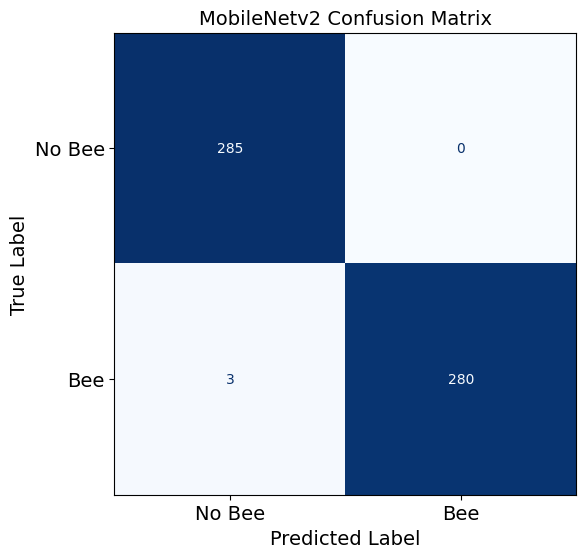

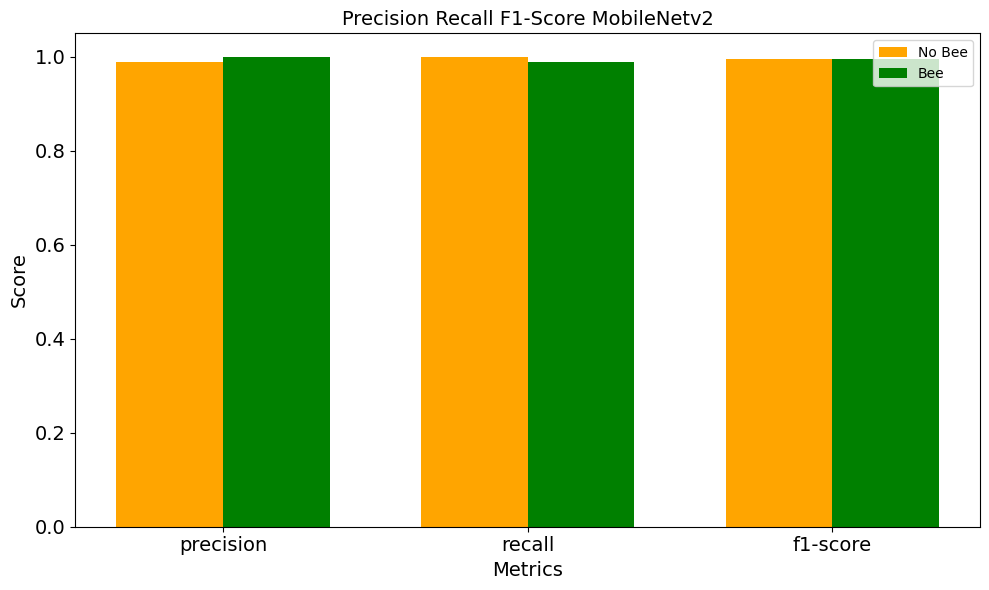

Overall Accuracy: 99.47%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/mobilenet_best_model.keras'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Load bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(1)  # Actual label is Bee

    # Load no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee'])

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('MobileNetv2 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_MobileNetv2.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score MobileNetv2',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_MobileNetv2.png', dpi=300)

plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[Bee_121.png] Prediction: Not Sure, Probability: 0.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
[Bee_1303.png] Prediction: Not Sure, Probability: 0.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
[Bee_786.png] Prediction: Not Sure, Probability: 0.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[Bee_653.png] Prediction: Not Sure, Probability: 0.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
[Bee_663.png] Prediction: Not Sure, Probability: 0.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[Bee_118.png] Prediction: Not Sure, Probability: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[Bee_96.png] Prediction: Not Sure, Probability: 0.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
[Bee_540.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[Bee_1373.png] Prediction: Not Sure, Probability: 0.48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[Bee_525.png] Prediction: Not Sure, Probability: 0.48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[Bee_985.png] Prediction: Not Sur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

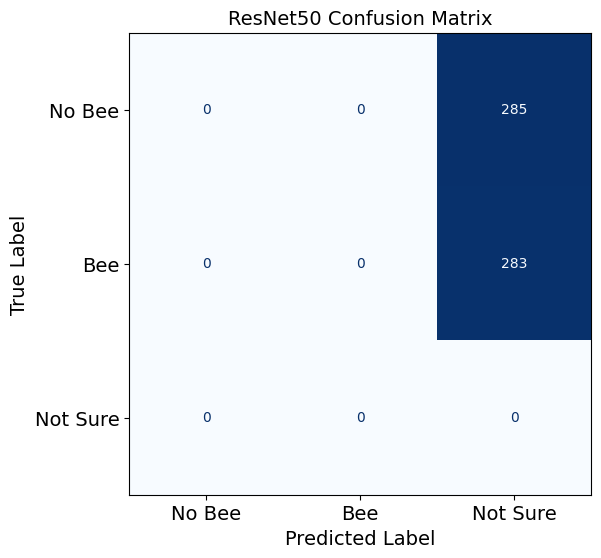

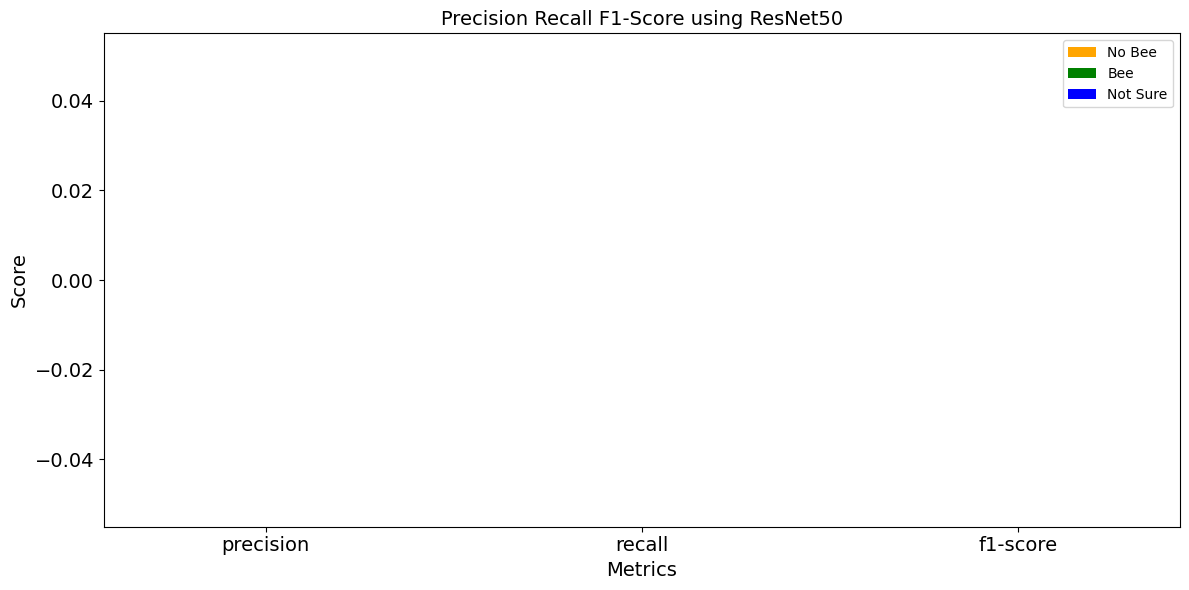

Overall Accuracy: 0.00%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/best_bee_classifier_model_res_spec.keras'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Process bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                    print(f"[{image_file}] Prediction: No Bee, Probability: {probability:.2f}")
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                    print(f"[{image_file}] Prediction: Bee, Probability: {probability:.2f}")
                else:
                    predictions.append(2)  # Predicted as Not Sure
                    not_sure_count += 1
                    print(f"[{image_file}] Prediction: Not Sure, Probability: {probability:.2f}")
                true_labels.append(1)  # Actual label is Bee

    # Process no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                    print(f"[{image_file}] Prediction: No Bee, Probability: {probability:.2f}")
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                    print(f"[{image_file}] Prediction: Bee, Probability: {probability:.2f}")
                else:
                    predictions.append(2)  # Predicted as Not Sure
                    not_sure_count += 1
                    print(f"[{image_file}] Prediction: Not Sure, Probability: {probability:.2f}")
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Map labels to include the new class
target_names = ['No Bee', 'Bee', 'Not Sure']

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('ResNet50 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_resnet50.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]
not_sure_metrics = [report['Not Sure'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.2  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x, bee_metrics, width, label='Bee', color='green')
plt.bar(x + width, not_sure_metrics, width, label='Not Sure', color='blue')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score using ResNet50',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee, No Bee_resnet50.png', dpi=300)
plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[Bee_121.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[Bee_1303.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[Bee_786.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[Bee_653.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[Bee_663.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[Bee_118.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[Bee_96.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[Bee_540.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[Bee_1373.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[Bee_525.png] Prediction: Not Sure, Probability: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[Bee_985.png] Prediction: Not Sure, Proba

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

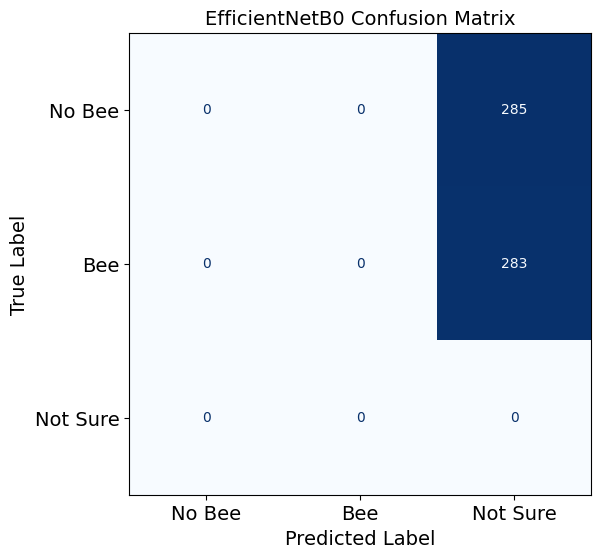

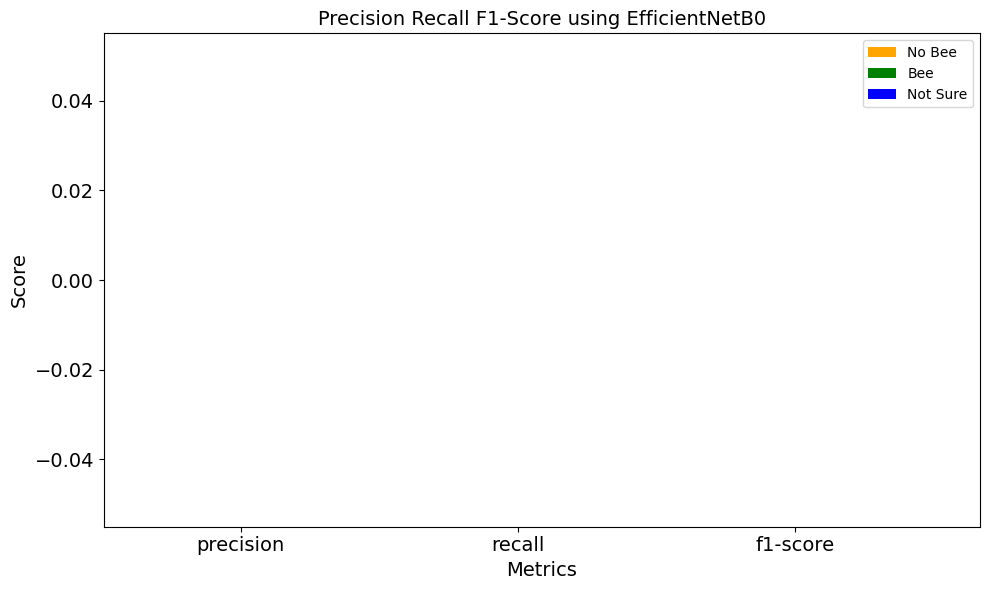

Overall Accuracy: 0.00%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/bee_classifier_model.h5'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Process bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                    print(f"[{image_file}] Prediction: No Bee, Probability: {probability:.2f}")
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                    print(f"[{image_file}] Prediction: Bee, Probability: {probability:.2f}")
                else:
                    predictions.append(2)  # Predicted as Not Sure
                    not_sure_count += 1
                    print(f"[{image_file}] Prediction: Not Sure, Probability: {probability:.2f}")
                true_labels.append(1)  # Actual label is Bee

    # Process no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                    print(f"[{image_file}] Prediction: No Bee, Probability: {probability:.2f}")
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                    print(f"[{image_file}] Prediction: Bee, Probability: {probability:.2f}")
                else:
                    predictions.append(2)  # Predicted as Not Sure
                    not_sure_count += 1
                    print(f"[{image_file}] Prediction: Not Sure, Probability: {probability:.2f}")
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Map labels to include the new class
target_names = ['No Bee', 'Bee', 'Not Sure']

# Evaluate the model
# y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee','Not Sure'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee','Not Sure']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee','Not Sure'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('EfficientNetB0 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_EfficientNetB0.png', dpi=300, bbox_inches='tight')

plt.show()


# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]
not_sure_metrics = [report['Not Sure'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')
plt.bar(x + width, not_sure_metrics, width, label='Not Sure', color='blue')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score using EfficientNetB0',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_EfficientNetB0.png', dpi=300)
plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

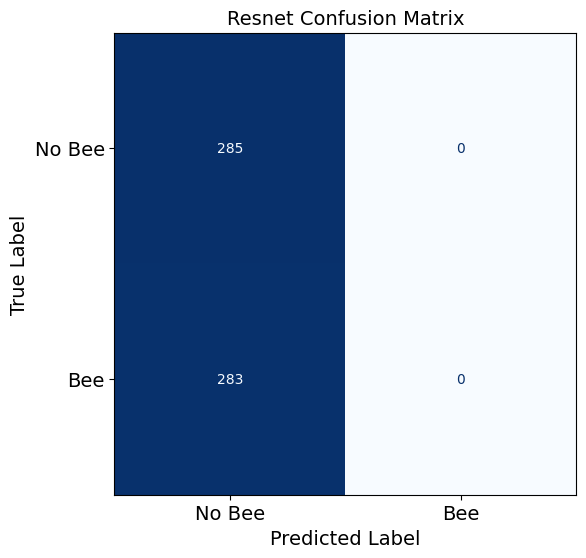

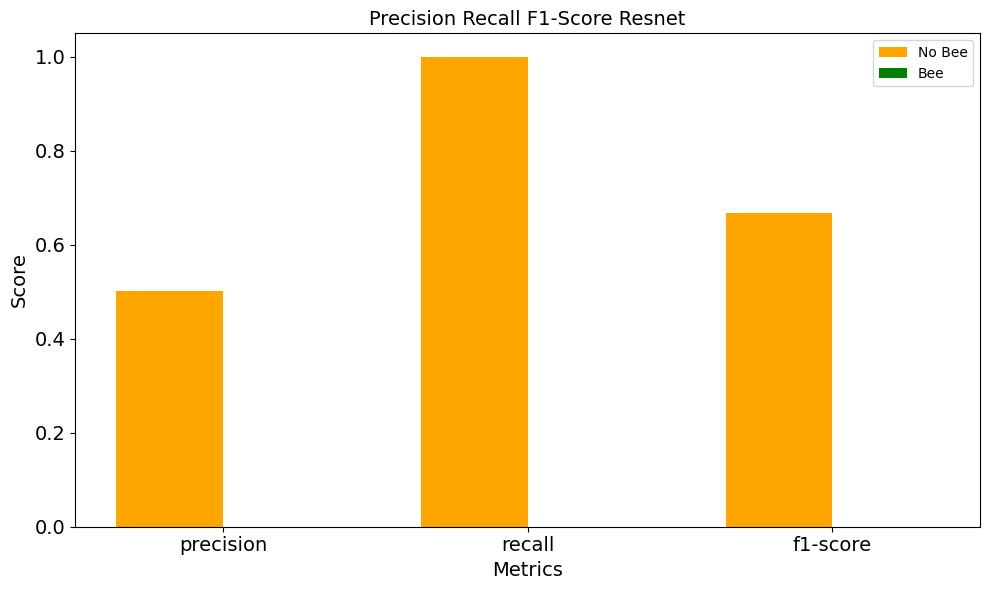

Overall Accuracy: 50.18%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/best_bee_classifier_model_res_spec.keras'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Load bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(1)  # Actual label is Bee

    # Load no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee'])

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('Resnet Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_Resnet.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score Resnet',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_Resnet.png', dpi=300)

plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

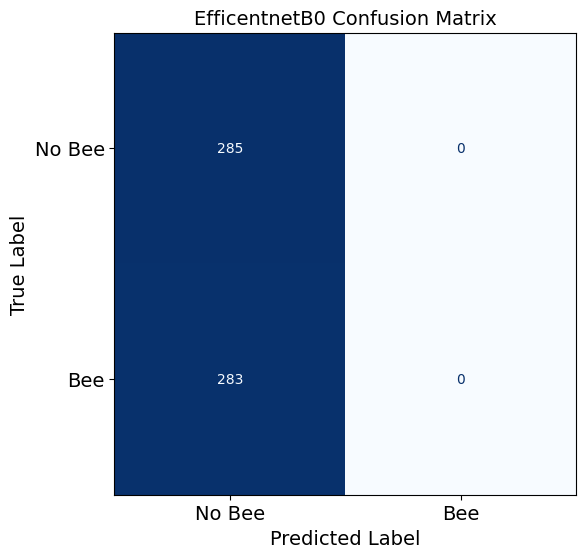

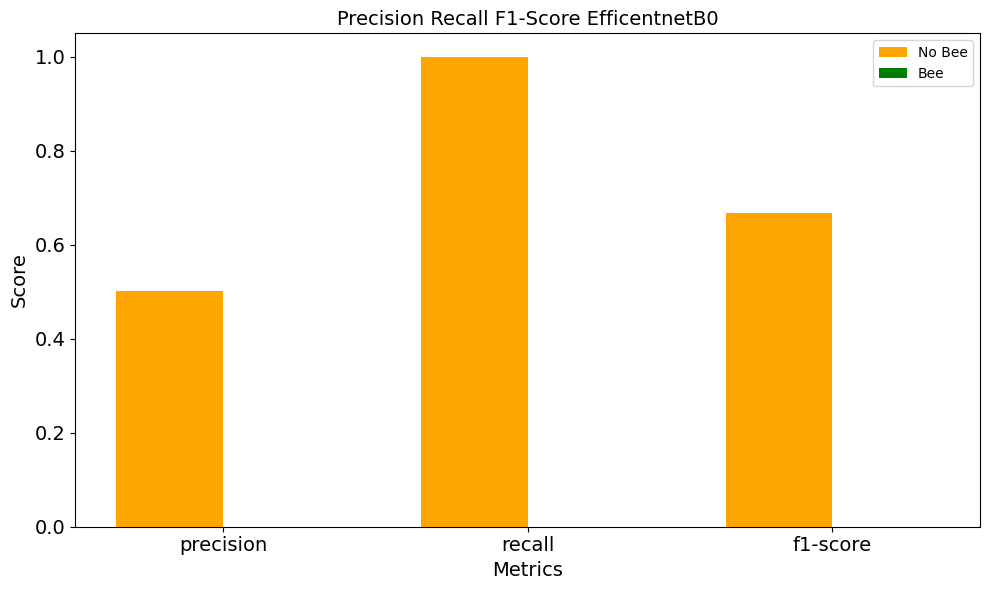

Overall Accuracy: 50.18%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/bee_classifier_model.h5'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Load bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(1)  # Actual label is Bee

    # Load no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee'])

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('EfficentnetB0 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_EfficentnetB0 .png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score EfficentnetB0',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_EfficentnetB0 .png', dpi=300)

plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor

def create_spectrogram(audio_chunk, sr, save_path):
    """
    Create a spectrogram from audio chunk and save it as an image.
    """
    try:
        # Generate the Mel Spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_chunk, sr=sr, n_mels=128, fmax=8000)

        # Convert the Mel Spectrogram to decibels (log scale)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Plot the Mel Spectrogram and save as an image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
        plt.axis('off')  # Remove axes
        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error creating spectrogram: {e}")

def classify_spectrogram(image_path, model, feature_extractor):
    """
    Classify a spectrogram image using a pre-trained ViT model.
    """
    image = Image.open(image_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_idx = logits.argmax(-1).item()
    return predicted_class_idx

def process_audio(file_path, model, feature_extractor, output_dir):
    """
    Process the audio file, split it into 10-second chunks, generate spectrograms,
    classify them, and return the results.
    """
    try:
        # Load audio
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)

        # Create output directory for spectrograms
        os.makedirs(output_dir, exist_ok=True)

        # Split audio into 10-second chunks
        chunk_length = 10 * sr  # 10 seconds in samples
        total_chunks = int(np.ceil(len(y) / chunk_length))
        bee_count = 0
        no_bee_count = 0

        for i in range(total_chunks):
            start_sample = i * chunk_length
            end_sample = min((i + 1) * chunk_length, len(y))
            audio_chunk = y[start_sample:end_sample]

            # Generate and save spectrogram for the chunk
            spectrogram_path = os.path.join(output_dir, f"chunk_{i}.png")
            create_spectrogram(audio_chunk, sr, spectrogram_path)

            # Classify the spectrogram
            predicted_class_idx = classify_spectrogram(spectrogram_path, model, feature_extractor)
            if predicted_class_idx == 0:
                bee_count += 1
                label = "bee"
            else:
                no_bee_count += 1
                label = "no bee"
            print(f"Chunk {i + 1}/{total_chunks}: Predicted class = {label}")

        # Summary
        print("\nSummary:")
        print(f"Total segments: {total_chunks}")
        print(f"Segments classified as 'bee': {bee_count}")
        print(f"Segments classified as 'no bee': {no_bee_count}")
    except Exception as e:
        print(f"Error processing audio: {e}")

# Paths
audio_path = "/content/4FilesMerged_20250113_121325.mp3"  # Replace with your audio file path
output_dir = "/content/spectograms"
model_dir = "/content/models"  # Directory containing model files

# Load model and feature extractor
model = ViTForImageClassification.from_pretrained(model_dir)
model.eval()
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# Process the audio file
process_audio(audio_path, model, feature_extractor, output_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

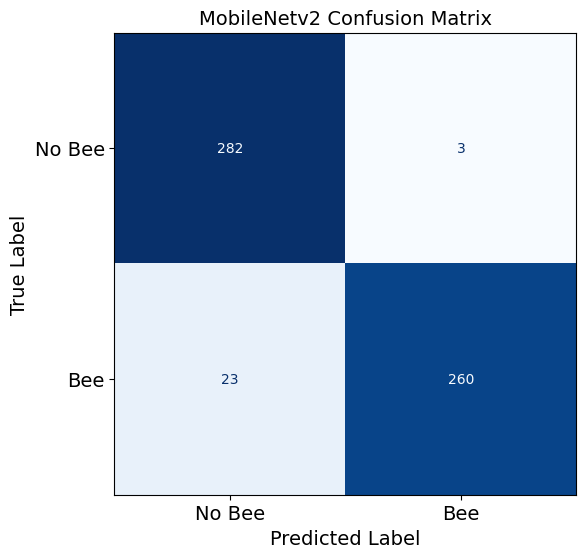

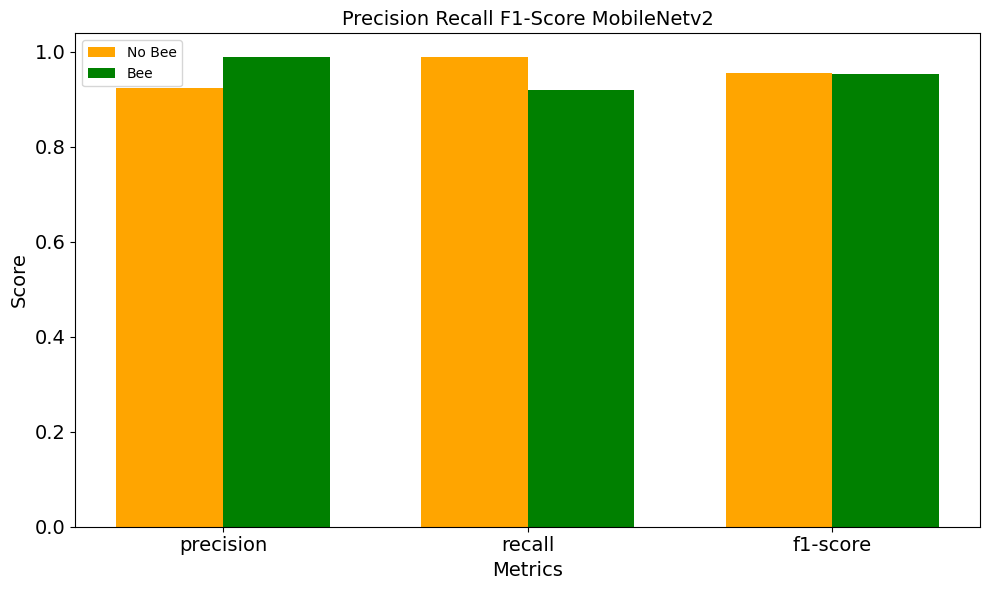

Overall Accuracy: 95.42%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test_chromagram'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/chromograms/mobilenet_best_model_chromograms.keras'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Load bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(1)  # Actual label is Bee

    # Load no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee'])

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('MobileNetv2 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_MobileNetv2.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score MobileNetv2',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_MobileNetv2.png', dpi=300)

plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

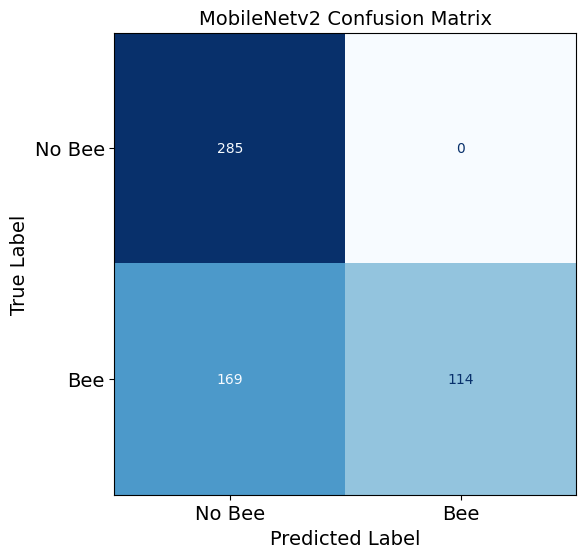

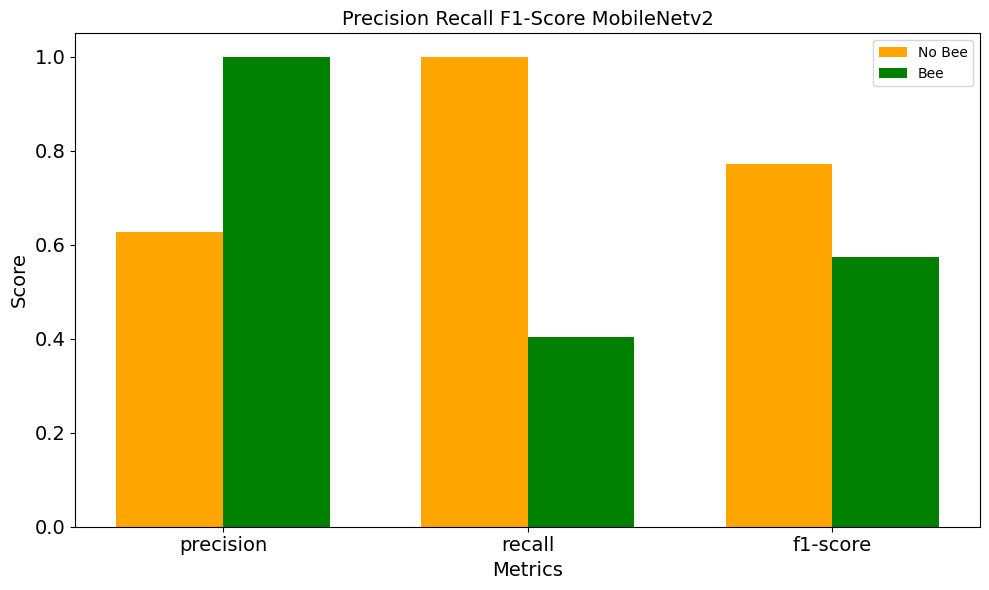

Overall Accuracy: 70.25%


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths
test_dir = '/content/drive/MyDrive/bee_dataset/test_chromagram'  # Replace with your test dataset path
bee_dir = os.path.join(test_dir, 'bee')
no_bee_dir = os.path.join(test_dir, 'no_bee')
model_path = '/content/drive/MyDrive/bee_dataset/chromograms/mobilenet_final_model_chromograms.keras'

# Load the pre-trained MobileNetV2 model
model = load_model(model_path)

# Function to preprocess an image
def preprocess_image(image_path, img_size=(224, 224)):
    try:
        # Open the image, convert to RGB, resize, and normalize
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        return np.expand_dims(img_array, axis=0)  # Add batch dimension
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to load and predict on test data
# Function to load and predict on test data
def evaluate_model(test_dir, model):
    true_labels = []
    predictions = []
    not_sure_count = 0
    bee_count = 0
    no_bee_count = 0

    # Load bee images
    for image_file in os.listdir(bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(1)  # Actual label is Bee

    # Load no-bee images
    for image_file in os.listdir(no_bee_dir):
        if image_file.endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(no_bee_dir, image_file)
            img_array = preprocess_image(image_path)
            if img_array is not None:
                probability = model.predict(img_array)[0][0]
                if probability >= 0.8:
                    predictions.append(0)  # Predicted as No Bee
                    no_bee_count += 1
                elif probability <= 0.2:
                    predictions.append(1)  # Predicted as Bee
                    bee_count += 1
                else:
                    predictions.append(0)  # Not Sure classified as No Bee
                    no_bee_count += 1
                    not_sure_count += 1
                true_labels.append(0)  # Actual label is No Bee

    print(f"Summary: Bee Count = {bee_count}, No Bee Count = {no_bee_count}, Not Sure Count = {not_sure_count}")
    return np.array(true_labels), np.array(predictions)

# Evaluate the model
y_true, y_pred = evaluate_model(test_dir, model)

# Generate classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=['No Bee', 'Bee'], output_dict=True)
print(classification_report(y_true, y_pred, target_names=['No Bee', 'Bee']))



# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bee', 'Bee'])

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)  # Disable the color bar
plt.title('MobileNetv2 Confusion Matrix', fontsize=14)  # Set title font size
plt.xlabel('Predicted Label', fontsize=14)  # Set x-axis label font size
plt.ylabel('True Label', fontsize=14)  # Set y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with high DPI
plt.savefig('confusion_matrix_MobileNetv2.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualize Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
bee_metrics = [report['Bee'][metric] for metric in metrics]
no_bee_metrics = [report['No Bee'][metric] for metric in metrics]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, no_bee_metrics, width, label='No Bee', color='orange')
plt.bar(x + width/2, bee_metrics, width, label='Bee', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('Precision Recall F1-Score MobileNetv2',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('Precision, Recall, and F1-Score for Bee and No Bee_MobileNetv2.png', dpi=300)

plt.show()

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from transformers import ViTForImageClassification, ViTImageProcessor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def classify_spectrogram(image_path, model, processor):
    """
    Classify a spectrogram image using a pre-trained ViT model.
    """
    try:
        image = Image.open(image_path).convert("RGB")
        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            predicted_class_idx = logits.argmax(-1).item()
        return predicted_class_idx
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def classify_images_in_directory(image_dir, model, processor):
    """
    Recursively classify all images in a directory (including subdirectories).
    Compute confusion matrix and classification metrics.
    """
    y_true = []  # Actual labels
    y_pred = []  # Predicted labels

    # Walk through all files and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)

                # Assuming file names contain ground truth: "bee_xxx.png" or "nobee_xxx.png"
                actual_label = 0 if "bee" in file.lower() else 1  # 0 = bee, 1 = no bee
                predicted_class_idx = classify_spectrogram(image_path, model, processor)

                if predicted_class_idx is not None:
                    y_true.append(actual_label)
                    y_pred.append(predicted_class_idx)
                    label = "bee" if predicted_class_idx == 0 else "no bee"
                    print(f"Image: {image_path} -> Predicted: {label}")

    # Convert lists to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)  # Handle zero division
    recall = recall_score(y_true, y_pred, zero_division=1)

    # Summary
    print("\nClassification Summary:")
    print(f"Total images processed: {len(y_true)}")
    print(f"Actual 'bee' count: {np.sum(y_true == 0)}")
    print(f"Actual 'no bee' count: {np.sum(y_true == 1)}")
    print(f"Predicted 'bee' count: {np.sum(y_pred == 0)}")
    print(f"Predicted 'no bee' count: {np.sum(y_pred == 1)}")

    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(f"TP (bee correctly classified): {tp}")
    print(f"FP (no bee misclassified as bee): {fp}")
    print(f"FN (bee misclassified as no bee): {fn}")
    print(f"TN (no bee correctly classified): {tn}")

    # Print performance metrics
    print("\nPerformance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

# Paths
test_image_dir = "/content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1"  # Replace with your dataset path
model_dir = "/content/drive/MyDrive/Our own dataset created Backup correct/vit_model"  # Directory containing model files

# Load model and processor
model = ViTForImageClassification.from_pretrained(model_dir)
model.eval()
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

# Classify all test images
classify_images_in_directory(test_image_dir, model, processor)


Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_644.png -> Predicted: no bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_335.png -> Predicted: bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_235.png -> Predicted: no bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_248.png -> Predicted: bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_319.png -> Predicted: bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_105.png -> Predicted: no bee
Image: /content/drive/MyDrive/Our own dataset created Backup correct/own_dataset_spectogram_train1/No_Bee/No_Bee_340.png -> Predicted: no bee
Image: /content